# ENTREGA #3- Proyecto Final Data Science

<br>
<br>
<br>


En este proyecto se ha decidido analizar un dataset relacionado con el fútbol y, según el tipo de datos con los que se cuenten, obtener conclusiones útiles para predecir eventos o resultados durante un partido de fútbol.

### Equipo de Trabajo.

El equipo de trabajo para desarrollar este proyecto está conformado por:
<br>
- Darcy Guaiquire.
<br>
- David Bussi.
<br>
- Francisco Azuara.
<br>
- Jeremías Santa María.
<br>
- Marco Ríos.

### Fuente del Dataset.

El dataset a utilizar fue obtenido de Kaggle, especificamente del siguiente enlace:
<br>
https://www.kaggle.com/datasets/prathamsharma123/comprehensive-football-dataset

En este dat set hay información de de las 5 "grandes ligas" europeas (Inglaterra, España, Italia, Alemania y Francia) entre las temporadas 2011/2012 y 2016/2017.
<br>
Encontramos tablas en formato .csv, con los puntos de cada equipo a lo largo de varias temporadas, que al final no resultan tan útiles pues es la única infomación que contienen.
Pero tiene otras tablas en las que hay información detallada sobre los partidos disputados y los eventos ocurridos dentro de cada encuentro. Además de un diccionario (.txt) para interpretar los valores en dichas tablas.
<br>


Se determinó utilizar este data set debido a cuenta con una tabla llamada "events" en la cual hay distintas variables que nos pueden resultar útiles para lograr nuestro objetivo.


### Objetivo.

El objetivo que nos hemos planteado es el de determinar que ocasiones o eventos durante un partido terminarán en gol.
Todo esto teniendo en cuenta datos como el tipo de jugada, método de asistencia, ubicación desde donde se realizó el tiro, ubicación donde termina el tiro, etc.
<br>
Se desea identificar como cada una de las variables afecta en la probabilidad de que una ocasión termine o no en gol.


In [1]:

#importamos librerias necesarias para nuestro analisis 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Procesos de Data Acquisition y Data Wrangling

<br>
<br>


In [2]:

# Leemos el dataframe con pandas
events = pd.read_csv("events.csv")
events.head(15)


,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
5,UFot0hit/,UFot0hit6,6,9,Hand ball by Jose Paolo Guerrero (Hamburg).,10,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
6,UFot0hit/,UFot0hit7,7,10,"Corner, Hamburg. Conceded by Lukasz Piszczek.",2,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
7,UFot0hit/,UFot0hit8,8,11,Chris Lowe (Borussia Dortmund) wins a free kic...,8,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
8,UFot0hit/,UFot0hit9,9,11,Foul by Gojko Kacar (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
9,UFot0hit/,UFot0hit10,10,13,Foul by Gokhan Tore (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0


<br>
<br>
<br>

In [3]:

#Obtenemos informacion sobre los tipos de datos de nuestras columnas con le método "info".
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

<br>
<br>
<br>

In [4]:
#Se genera una función para sustitutir los valores numéricos por Strings por medio del diccionario.
new = dict()
with open("dictionary.txt") as f:
    data = f.read()
data = data.split("\n\n\n")
for i in range(len(data)):
    if data[i]:
        variable = data[i].split("\n")[0]
        values = data[i].split("\n")[1:]
        new[variable] = {int(val.split("\t")[0]):val.split("\t")[1] for val in values}
        
for name in new:
    events[name] = events[name].map(new[name])

events


,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,Attempt,Key Pass,Away,Hamburg SV,Borussia Dortmund,...,NaN,NaN,High and wide,Off target,0,Left side of the box,left foot,Pass,Open play,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",Corner,NaN,Home,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",Corner,NaN,Home,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,Foul,NaN,Home,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,Free kick won,NaN,Away,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,Defensive half,NaN,None,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,z5L2OT5E/,z5L2OT5E123,123,92,Lucas Torreira (Sampdoria) wins a free kick in...,Free kick won,NaN,Away,Sampdoria,Atalanta,...,NaN,NaN,NaN,NaN,0,Defensive half,NaN,None,NaN,0
941005,z5L2OT5E/,z5L2OT5E124,124,93,"Corner, Sampdoria. Conceded by Andrea Masiello.",Corner,NaN,Away,Sampdoria,Atalanta,...,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,0
941006,z5L2OT5E/,z5L2OT5E125,125,93,Attempt missed. Fabio Quagliarella (Sampdoria)...,Attempt,Key Pass,Away,Sampdoria,Atalanta,...,NaN,NaN,Misses to the left,Off target,0,Left side of the box,right foot,Pass,Corner,0
941007,z5L2OT5E/,z5L2OT5E126,126,94,Alberto Grassi (Atalanta) wins a free kick on ...,Free kick won,NaN,Home,Atalanta,Sampdoria,...,NaN,NaN,NaN,NaN,0,Left wing,NaN,None,NaN,0


<br>
<br>
<br>

In [5]:
#Hacemos una lista de las columnas de nuestro dataframe para poder analizarlas mas facilmente.
columns_name = list(events.columns)
sorted(columns_name)

['assist_method',
 'bodypart',
 'event_team',
 'event_type',
 'event_type2',
 'fast_break',
 'id_event',
 'id_odsp',
 'is_goal',
 'location',
 'opponent',
 'player',
 'player2',
 'player_in',
 'player_out',
 'shot_outcome',
 'shot_place',
 'side',
 'situation',
 'sort_order',
 'text',
 'time']

In [6]:
# Descripcion de los datos numericos de nuestro dataframe.
events.describe()

,sort_order,time,is_goal,fast_break
count,941009.000000,941009.000000,941009.000000,941009.000000
mean,53.858826,49.663663,0.025978,0.004876
std,32.014268,26.488977,0.159071,0.069655
min,1.000000,0.000000,0.000000,0.000000
25%,27.000000,27.000000,0.000000,0.000000
50%,53.000000,51.000000,0.000000,0.000000
75%,79.000000,73.000000,0.000000,0.000000
max,180.000000,100.000000,1.000000,1.000000


<br>

In [7]:
#De los 941009 datas de acciones el partido podemos ver que 24446 son eventos que terminaron en gol.
events["is_goal"].value_counts()

0    916563
1     24446
Name: is_goal, dtype: int64

In [8]:

#Se eliminan las columnas que no aportan mayor información al análisis que se desea realizar.
#Se eliminana las que tienen muchos valores nulos o no son útiles.
events_clean = events.drop(["event_type2","fast_break","id_event","id_odsp","player2","player_in","player_out",
                            "sort_order","text"], axis=1)
events_clean

,time,event_type,side,event_team,opponent,player,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,2,Attempt,Away,Hamburg SV,Borussia Dortmund,mladen petric,High and wide,Off target,0,Left side of the box,left foot,Pass,Open play
1,4,Corner,Home,Borussia Dortmund,Hamburg SV,dennis diekmeier,NaN,NaN,0,NaN,NaN,None,NaN
2,4,Corner,Home,Borussia Dortmund,Hamburg SV,heiko westermann,NaN,NaN,0,NaN,NaN,None,NaN
3,7,Foul,Home,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,0,NaN,NaN,None,NaN
4,7,Free kick won,Away,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,0,Defensive half,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
941004,92,Free kick won,Away,Sampdoria,Atalanta,lucas torreira,NaN,NaN,0,Defensive half,NaN,None,NaN
941005,93,Corner,Away,Sampdoria,Atalanta,NaN,NaN,NaN,0,NaN,NaN,None,NaN
941006,93,Attempt,Away,Sampdoria,Atalanta,fabio quagliarella,Misses to the left,Off target,0,Left side of the box,right foot,Pass,Corner
941007,94,Free kick won,Home,Atalanta,Sampdoria,alberto grassi,NaN,NaN,0,Left wing,NaN,None,NaN


<br>
<br>

In [9]:

#Ya que limpiamos las columnas que no tenemos pensado utilizar, ahora filtramos las filas que son
#útiles para el analisis que queremos realizar (todas las jugadas que terminaron en un disparo).
events_clean_def =  events_clean[events_clean["shot_place"].notna()]
events_clean_def


,time,event_type,side,event_team,opponent,player,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,2,Attempt,Away,Hamburg SV,Borussia Dortmund,mladen petric,High and wide,Off target,0,Left side of the box,left foot,Pass,Open play
11,14,Attempt,Home,Borussia Dortmund,Hamburg SV,shinji kagawa,Top right corner,Off target,0,Outside the box,right foot,Pass,Open play
13,17,Attempt,Home,Borussia Dortmund,Hamburg SV,kevin grosskreutz,Bottom right corner,On target,1,Left side of the box,left foot,Pass,Open play
14,19,Attempt,Home,Borussia Dortmund,Hamburg SV,mats hummels,Blocked,Blocked,0,Outside the box,right foot,None,Open play
17,20,Attempt,Away,Hamburg SV,Borussia Dortmund,tomas rincon,Blocked,Blocked,0,Outside the box,right foot,None,Open play
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,81,Attempt,Home,Atalanta,Sampdoria,remo freuler,Blocked,Blocked,0,Outside the box,right foot,None,Open play
940991,84,Attempt,Home,Atalanta,Sampdoria,alberto grassi,Too high,Off target,0,Outside the box,right foot,Pass,Open play
940992,86,Attempt,Home,Atalanta,Sampdoria,alejandro gomez,Centre of the goal,On target,0,Left side of the box,right foot,Pass,Open play
940993,87,Attempt,Away,Sampdoria,Atalanta,fabio quagliarella,Centre of the goal,On target,0,Outside the box,right foot,Pass,Open play


In [10]:

#Se vuelve a aplicar el método "info" para ver que información tenemos.
events_clean_def.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 227459 entries, 0 to 941006
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   time           227459 non-null  int64 
 1   event_type     227459 non-null  object
 2   side           227459 non-null  object
 3   event_team     227459 non-null  object
 4   opponent       227459 non-null  object
 5   player         227451 non-null  object
 6   shot_place     227459 non-null  object
 7   shot_outcome   227452 non-null  object
 8   is_goal        227459 non-null  int64 
 9   location       227452 non-null  object
 10  bodypart       227459 non-null  object
 11  assist_method  227459 non-null  object
 12  situation      227452 non-null  object
dtypes: int64(2), object(11)
memory usage: 24.3+ MB


In [11]:

#Se observa que aún hay columnas en las que tenemos unos cuanrtos datos nulos.
#Por lo cual se descide eliminar dichos registros.
events_clean_1 = events_clean_def.dropna()
events_clean_1



,time,event_type,side,event_team,opponent,player,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,2,Attempt,Away,Hamburg SV,Borussia Dortmund,mladen petric,High and wide,Off target,0,Left side of the box,left foot,Pass,Open play
11,14,Attempt,Home,Borussia Dortmund,Hamburg SV,shinji kagawa,Top right corner,Off target,0,Outside the box,right foot,Pass,Open play
13,17,Attempt,Home,Borussia Dortmund,Hamburg SV,kevin grosskreutz,Bottom right corner,On target,1,Left side of the box,left foot,Pass,Open play
14,19,Attempt,Home,Borussia Dortmund,Hamburg SV,mats hummels,Blocked,Blocked,0,Outside the box,right foot,None,Open play
17,20,Attempt,Away,Hamburg SV,Borussia Dortmund,tomas rincon,Blocked,Blocked,0,Outside the box,right foot,None,Open play
...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,81,Attempt,Home,Atalanta,Sampdoria,remo freuler,Blocked,Blocked,0,Outside the box,right foot,None,Open play
940991,84,Attempt,Home,Atalanta,Sampdoria,alberto grassi,Too high,Off target,0,Outside the box,right foot,Pass,Open play
940992,86,Attempt,Home,Atalanta,Sampdoria,alejandro gomez,Centre of the goal,On target,0,Left side of the box,right foot,Pass,Open play
940993,87,Attempt,Away,Sampdoria,Atalanta,fabio quagliarella,Centre of the goal,On target,0,Outside the box,right foot,Pass,Open play


In [12]:

#Se vuelve a aplicar el método "info" para comprobar que este dataframe ya no contenga datos nulos.
events_clean_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 227451 entries, 0 to 941006
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   time           227451 non-null  int64 
 1   event_type     227451 non-null  object
 2   side           227451 non-null  object
 3   event_team     227451 non-null  object
 4   opponent       227451 non-null  object
 5   player         227451 non-null  object
 6   shot_place     227451 non-null  object
 7   shot_outcome   227451 non-null  object
 8   is_goal        227451 non-null  int64 
 9   location       227451 non-null  object
 10  bodypart       227451 non-null  object
 11  assist_method  227451 non-null  object
 12  situation      227451 non-null  object
dtypes: int64(2), object(11)
memory usage: 24.3+ MB


In [13]:

#Se guarda el data frame que se acaba de limpiar.
events_clean_1.to_csv("data_limpia_disparos_1.csv")


## Análisis Univariado

<br>
<br>

In [14]:
# Agrupamos los resultados de los intentos de tiros al arco  y sus resultados
tiros = events_clean_1.groupby(events_clean_def["shot_place"]).size()
tiros

shot_place
Bit too high               6077
Blocked                   54081
Bottom left corner        18260
Bottom right corner       18748
Centre of the goal        25079
High and wide             15910
Hits the bar               3575
Misses to the left        27024
Misses to the right       25213
Too high                  15793
Top centre of the goal     5402
Top left corner            5983
Top right corner           6306
dtype: int64

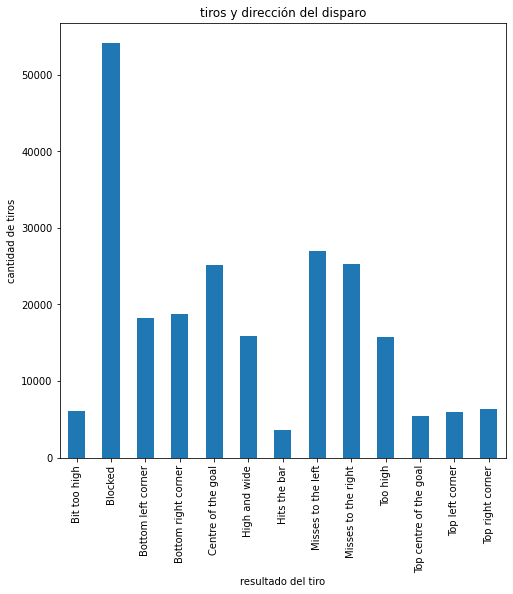

In [15]:
tiros.plot(kind="bar", title="tiros y dirección del disparo",  figsize = (8,8)  )
plt.xlabel ("resultado del tiro")
plt.ylabel ("cantidad de tiros")
plt.show()

In [16]:
#Analizamos y agrupamos el lugar desde donde se ejecuto cada tiro al arco
locacion_del_tiro = events_clean_1.groupby(["location"]).size()
locacion_del_tiro

location
Centre of the box                 69162
Difficult angle and long range     1513
Difficult angle on the left        2555
Difficult angle on the right       2447
Left side of the box              19000
Left side of the six yard box      3459
Long range                         1988
More than 35 yards                 1977
More than 40 yards                  255
Not recorded                        775
Outside the box                   93609
Penalty spot                       2506
Right side of the box             18396
Right side of the six yard box     3388
Very close range                   6421
dtype: int64

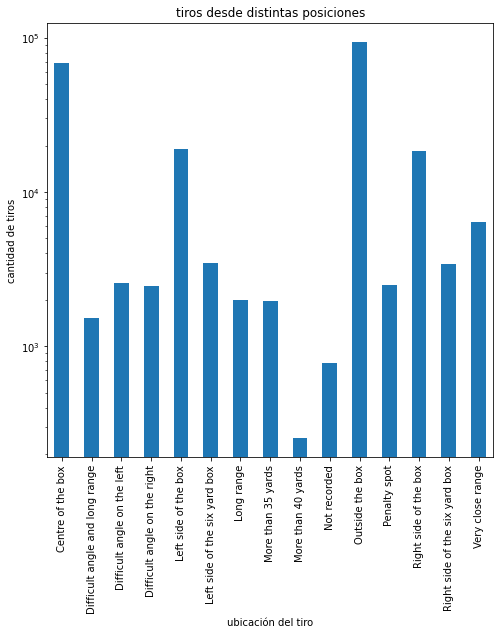

In [17]:
locacion_del_tiro.plot(kind="bar", title="tiros desde distintas posiciones",  figsize = (8,8)  )
plt.xlabel ("ubicación del tiro")
plt.ylabel ("cantidad de tiros")
plt.yscale ("log") 
plt.show()

In [18]:
# Agrupamos los resultados de los tiros, vemos que variable "Hit the bar" es menos usual que las demas, 
# ya que un disparo a los postes es menos frecuente que ocurra.
destino_de_tiros = events_clean_1.groupby(["shot_outcome"]).size()
destino_de_tiros

shot_outcome
Blocked        54081
Hit the bar     3575
Off target     92827
On target      76968
dtype: int64

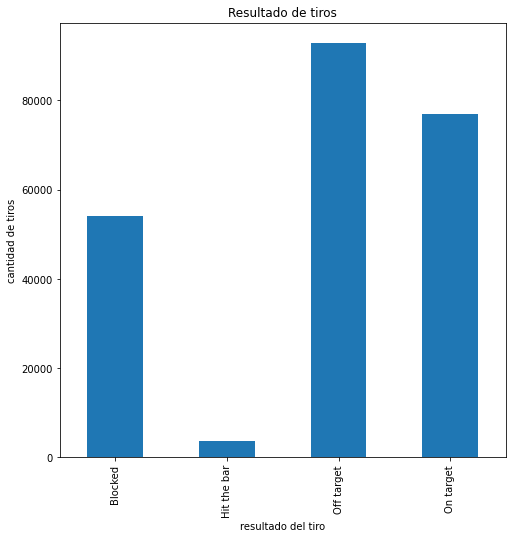

In [19]:
destino_de_tiros.plot(kind="bar", title="Resultado de tiros",  figsize = (8,8)  )
plt.xlabel ("resultado del tiro")
plt.ylabel ("cantidad de tiros")
plt.show()

In [20]:

#Analizamos los distintos tipos de valores en la variable "event_type"
tipo_de_evento = events_clean_1.groupby(["event_type"]).size()
tipo_de_evento
#Se observa que todos los casos están agrupados en un solo valor.


event_type
Attempt    227451
dtype: int64

In [21]:

#Agupamos la variable "is_goal" para identificar que porcentaje terminó o no en gol.
goals = events_clean_1.groupby(["is_goal"]).size()
goals
#Se observa como solo un 10.01% de los intentos termina en gol.


is_goal
0    204681
1     22770
dtype: int64

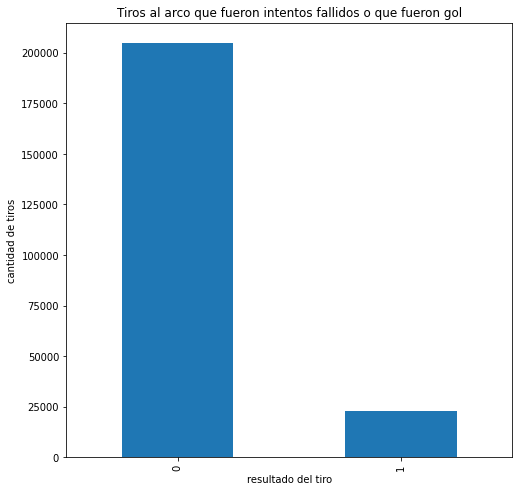

In [22]:

goals.plot(kind="bar", title="Tiros al arco que fueron intentos fallidos o que fueron gol",  figsize = (8,8)  )
plt.xlabel ("resultado del tiro")
plt.ylabel ("cantidad de tiros")
plt.show()


In [23]:

#En este group by de la columna "side" podemos ver si el intento de tiro fue del equipo local o del equipo visitante. 
# y vemos que los equipos locales tienen un porsentaje mas alto de tiros al arco (55.49% vs 44.51% )
locales_vs_visita = events_clean_1.groupby(["side"]).size()
locales_vs_visita
#Observamos que los equipos locales tienen un porcentaje más alto de tiros al arco (55.49% vs 44.51% )


side
Away    101241
Home    126210
dtype: int64

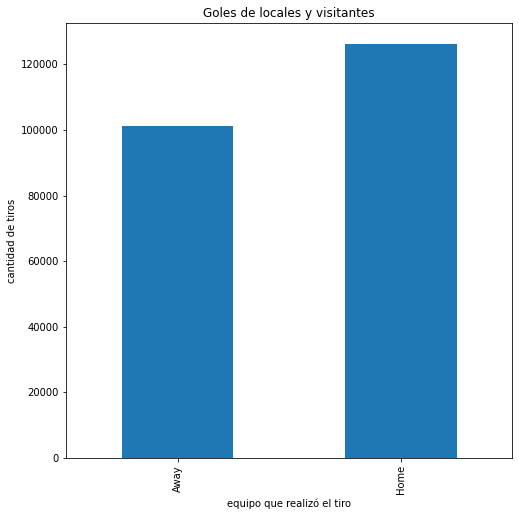

In [24]:
locales_vs_visita.plot(kind="bar", title="Goles de locales y visitantes",  figsize = (8,8)  )
plt.xlabel ("equipo que realizó el tiro")
plt.ylabel ("cantidad de tiros")
plt.show()

In [25]:

#Se analiza la columna "assist_method" podemos ver el el tipo de asistencia que deribó una ocación de gol. 
tipo_de_asistencia = events_clean_1.groupby(["assist_method"]).size()
tipo_de_asistencia
#En esta caso es notorio que la mayoría de los intentos vienen despúes de un pase bajo con el pie.


assist_method
Cross            42978
Headed pass       7659
None             60310
Pass            109191
Through ball      7313
dtype: int64

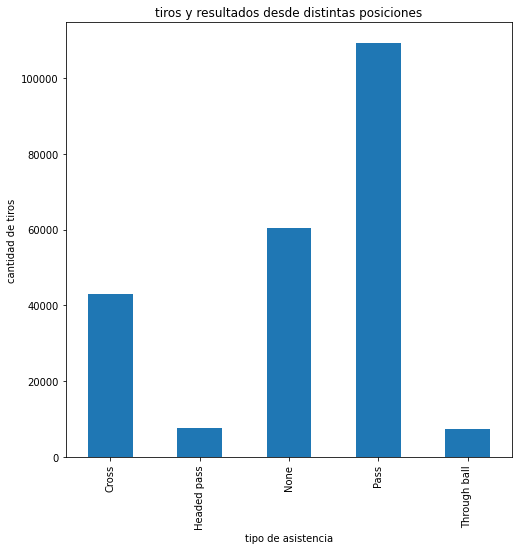

In [26]:
tipo_de_asistencia.plot(kind="bar", title="tiros y resultados desde distintas posiciones",  figsize = (8,8)  )
plt.xlabel ("tipo de asistencia")
plt.ylabel ("cantidad de tiros")
plt.show()

In [27]:

#Se analiza la columna "situation" para ver como se genero esa ocasión de gol. 
situacion_de_jugada = events_clean_1.groupby(["situation"]).size()
situacion_de_jugada
#Es claro que la mayoría de estas ocasiones viene de jugadas de juego continuas.


situation
Corner        18046
Free kick      5408
Open play    192430
Set piece     11567
dtype: int64

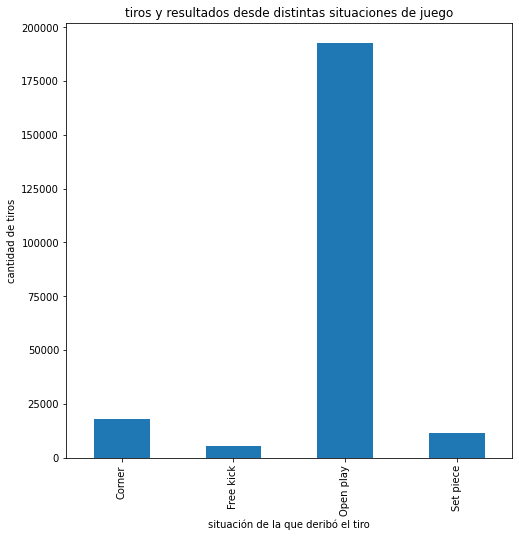

In [28]:
situacion_de_jugada.plot(kind="bar", title="tiros y resultados desde distintas situaciones de juego",  figsize = (8,8)  )
plt.xlabel ("situación de la que deribó el tiro")
plt.ylabel ("cantidad de tiros")
plt.show()

In [29]:

#Se agrupan los eventos según el ,inuto de partido en el que sucedieron.
tiros_en_el_tiempo =  events_clean_1.groupby(["time"]).size()
tiros_en_el_tiempo


time
0        35
1      1097
2      1760
3      1920
4      2053
       ... 
96       48
97       15
98        5
99        3
100       1
Length: 101, dtype: int64

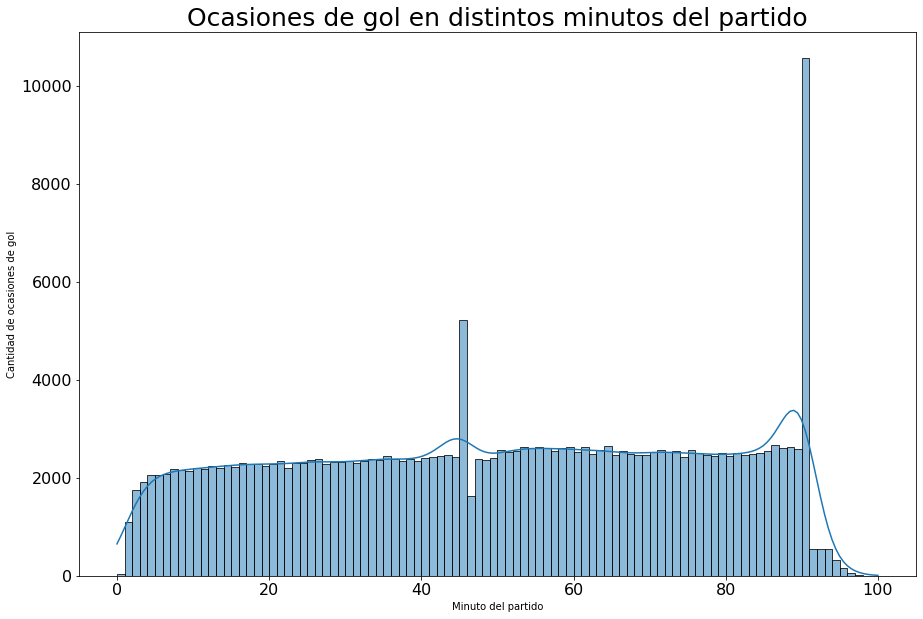

In [30]:

plt.figure(figsize=(15,10))
sns.histplot(events_clean_def["time"],kde=True, bins=100)
plt.xlabel ("Minuto del partido")
plt.ylabel ("Cantidad de ocasiones de gol")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Ocasiones de gol en distintos minutos del partido", fontsize= 25)
plt.show()

#En este gráfico se observa con claridad que la mayor concentración de ocasiones de gol se da durante los minutos finales.
#Tanto en los finales del primer tiempo (min 45) y en mayor medida cerca del final del partido (min 90)

## Análisis Bivariado y Multivariado

#### A continuacion realizaremos un analisis bivariado entre las columnas que son de nuestro interes 


Columnas importantes:

(shot_place = lugar donde termino el tiro) 

(Location = lugar donde se efectuó el tiro)

(shot_outcome = resultado del tiro) 

(is_goal = si fue o no un gol)

(side =  equipo que efectuó la jugada (local o visitante)) 

(bodypart = parte del cuerpo con la que realizó la definición de la jugada)

(assist_method = tipo de asistencia)

(situation = tipo de situacion de la jugada) 

(time = tiempo de las acciones en el partido)

#### Primero analizaremos  algunas de las variables relevantes junto a la variable "is_goal"


### Location - Is_goal


In [31]:
df_location_vs_isgoal = events_clean_1.groupby(["location","is_goal"]).size()
df_location_vs_isgoal

location                        is_goal
Centre of the box               0          58893
                                1          10269
Difficult angle and long range  0           1474
                                1             39
Difficult angle on the left     0           2362
                                1            193
Difficult angle on the right    0           2271
                                1            176
Left side of the box            0          17799
                                1           1201
Left side of the six yard box   0           2781
                                1            678
Long range                      0           1960
                                1             28
More than 35 yards              0           1955
                                1             22
More than 40 yards              0            252
                                1              3
Not recorded                    1            775
Outside the box              

In [32]:
df_location_vs_isgoal1 = pd.DataFrame(df_location_vs_isgoal)
df_location_vs_isgoal1

0
location                       is_goal       
Centre of the box              0        58893
                               1        10269
Difficult angle and long range 0         1474
                               1           39
Difficult angle on the left    0         2362
                               1          193
Difficult angle on the right   0         2271
                               1          176
Left side of the box           0        17799
                               1         1201
Left side of the six yard box  0         2781
                               1          678
Long range                     0         1960
                               1           28
More than 35 yards             0         1955
                               1           22
More than 40 yards             0          252
                               1            3
Not recorded                   1          775
Outside the box                0        91111
                               1         2498
Penalty spot                   0          607
                               1         1899
Right side of the box          0        17168
                               1         1228
Right side of the six yard box 0         2724
                               1          664
Very close range               0         3324
                               1         3097

In [33]:
df_location_vs_isgoal_final = pd.pivot_table(df_location_vs_isgoal1, columns="is_goal", index="location", values= 0)
df_location_vs_isgoal_final

is_goal,0,1
location,,
Centre of the box,58893.0,10269.0
Difficult angle and long range,1474.0,39.0
Difficult angle on the left,2362.0,193.0
Difficult angle on the right,2271.0,176.0
Left side of the box,17799.0,1201.0
Left side of the six yard box,2781.0,678.0
Long range,1960.0,28.0
More than 35 yards,1955.0,22.0
More than 40 yards,252.0,3.0


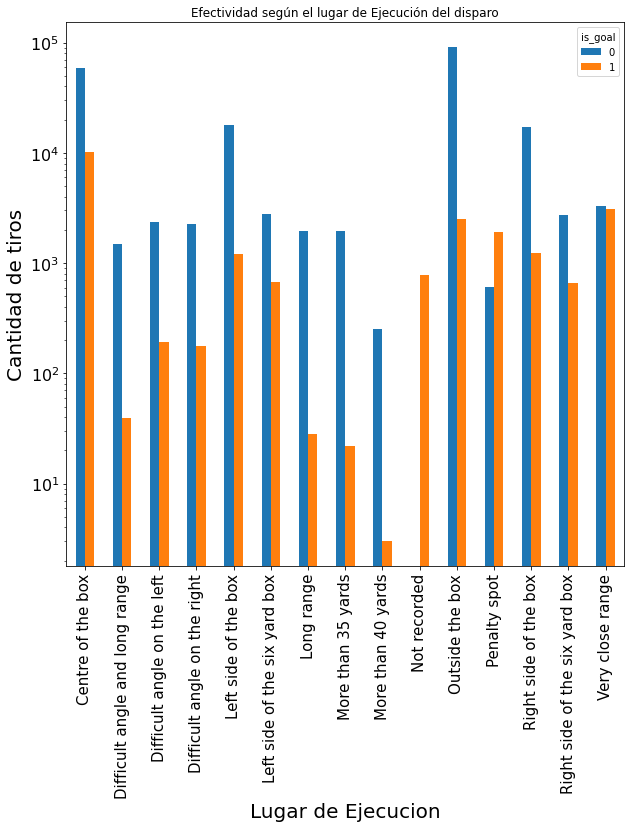

In [34]:
df_location_vs_isgoal_final.plot(kind="bar", title="Efectividad según el lugar de Ejecución del disparo",
                                 stacked=False, figsize = (10,10) )
plt.xlabel ("Lugar de Ejecucion", fontsize=20)
plt.ylabel ("Cantidad de tiros", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=16)
plt.yscale("log")
plt.show()

#### A partir de esta grafica podemos ver cuales son las zonas desde las que es más probale que la jugada termine en gol.


### Analizaremos el destino de cada remate con los goles marcados 

In [35]:
#agrupamos los destinos de los remates con las jugadas que fueron y no fueron gol
df_shot_place_vs_isgoal = events_clean_1.groupby(["shot_place","is_goal"]).size()
df_shot_place_vs_isgoal

shot_place              is_goal
Bit too high            0           6077
Blocked                 0          54081
Bottom left corner      0          11048
                        1           7212
Bottom right corner     0          11816
                        1           6932
Centre of the goal      0          20633
                        1           4446
High and wide           0          15910
Hits the bar            0           3575
Misses to the left      0          27024
Misses to the right     0          25213
Too high                0          15793
Top centre of the goal  0           5402
Top left corner         0           3960
                        1           2023
Top right corner        0           4149
                        1           2157
dtype: int64

In [36]:
#creamos un df con las variables separadas
df_shot_place_vs_isgoal1 = df_shot_place_vs_isgoal.reset_index()
df_shot_place_vs_isgoal1

,shot_place,is_goal,0
0,Bit too high,0,6077
1,Blocked,0,54081
2,Bottom left corner,0,11048
3,Bottom left corner,1,7212
4,Bottom right corner,0,11816
5,Bottom right corner,1,6932
6,Centre of the goal,0,20633
7,Centre of the goal,1,4446
8,High and wide,0,15910
9,Hits the bar,0,3575


In [37]:
# realizamos un pivot para tener los datos accesibles a la hora de graficar
df_shot_place_vs_isgoal_final = pd.pivot_table(df_shot_place_vs_isgoal1, columns="is_goal", index="shot_place", values= 0)
df_shot_place_vs_isgoal_final

is_goal,0,1
shot_place,,
Bit too high,6077.0,NaN
Blocked,54081.0,NaN
Bottom left corner,11048.0,7212.0
Bottom right corner,11816.0,6932.0
Centre of the goal,20633.0,4446.0
High and wide,15910.0,NaN
Hits the bar,3575.0,NaN
Misses to the left,27024.0,NaN
Misses to the right,25213.0,NaN


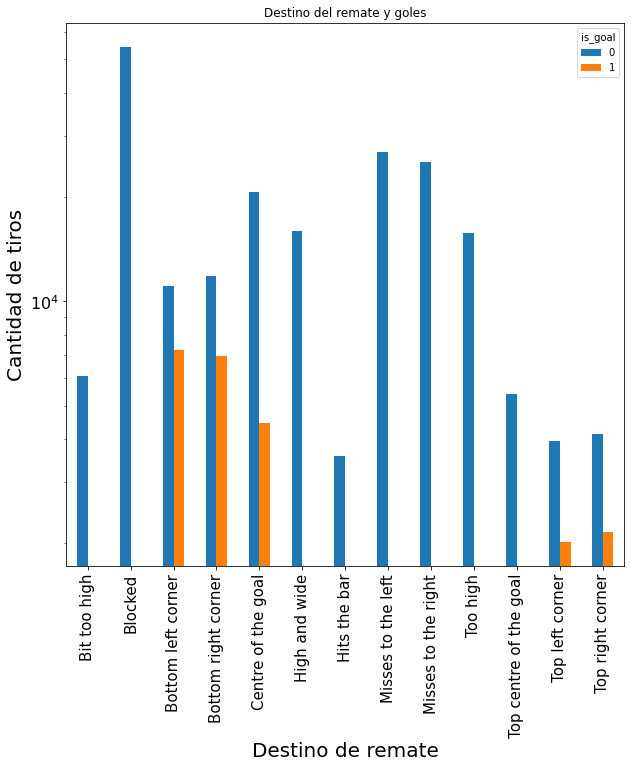

In [38]:
# Realizamos la grafica 
df_shot_place_vs_isgoal_final.plot(kind="bar", title="Destino del remate y goles",
                                 stacked=False, figsize = (10,10) )
plt.xlabel ("Destino de remate", fontsize=20)
plt.ylabel ("Cantidad de tiros", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=16)
plt.yscale("log")
plt.show()

#### Podemos ver que en los destinos tan solo hay 5 variables que pueden terminar en gol (claramente son los remates con dirección a portería), y las ejecuciones con mas probabilidad de terminar en gol son en las esquinas inferiores del arco.

<br>
<br>

### Analizaremos los goles realizados tanto de los locales como de los visitantes 


In [39]:
df_localidad_vs_goal = events_clean_1.groupby(["side","is_goal"]).size()
df_localidad_vs_goal

side  is_goal
Away  0           91535
      1            9706
Home  0          113146
      1           13064
dtype: int64

In [40]:
df_localidad_vs_goal1 = df_localidad_vs_goal.reset_index()
df_localidad_vs_goal1

,side,is_goal,0
0,Away,0,91535
1,Away,1,9706
2,Home,0,113146
3,Home,1,13064


In [41]:
df_localidad_vs_goal_final = pd.pivot_table(df_localidad_vs_goal1, columns="is_goal", index="side", values= 0)
df_localidad_vs_goal_final

is_goal,0,1
side,,
Away,91535,9706
Home,113146,13064


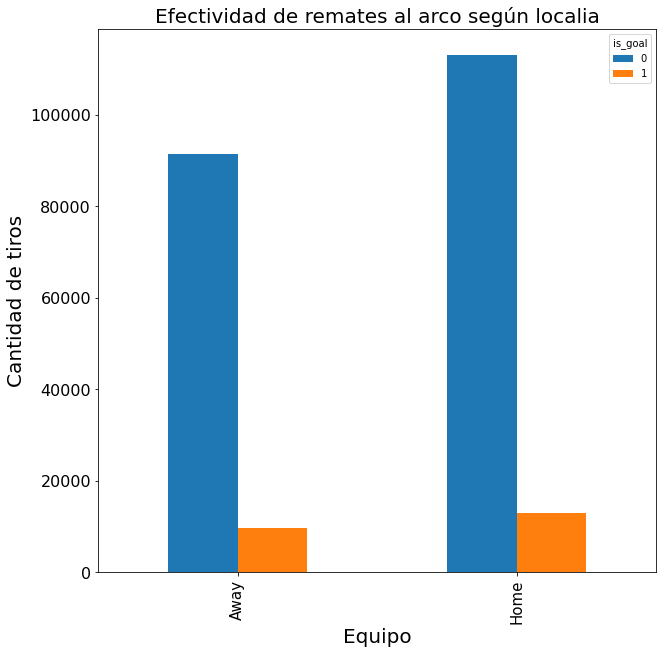

In [42]:
# Realizamos la grafica 
df_localidad_vs_goal_final.plot(kind="bar",
                                 stacked=False, figsize = (10,10) )
plt.xlabel ("Equipo", fontsize=20)
plt.ylabel ("Cantidad de tiros", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=16)
plt.title("Efectividad de remates al arco según localia", fontsize= 20)
plt.show()

### Analizamos los tiros que termiaron en gol según con la parte del cuerpo que se realizó el remate.

In [43]:

#Se realiza un groupby para obtener la agrupación de los tiros que termiaron en gol- 
#según con la parte del cuerpo que se realizó el remate.
bodypart_vs_goal = pd.DataFrame(events_clean_1.groupby(["is_goal" , "bodypart"]).size())
bodypart_vs_goal



0
is_goal bodypart          
0       head         31720
        left foot    64520
        right foot  108441
1       head          3977
        left foot     6517
        right foot   12276

In [44]:

bodypart_vs_goal1 = pd.pivot_table(bodypart_vs_goal, columns="is_goal", index="bodypart", values = 0)
bodypart_vs_goal1


is_goal,0,1
bodypart,,
head,31720,3977
left foot,64520,6517
right foot,108441,12276


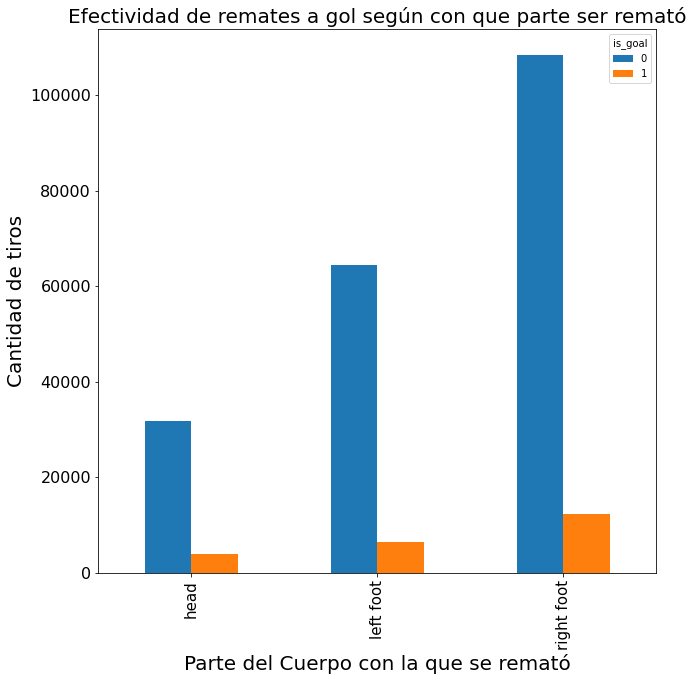

In [45]:

# Realizamos la grafica 
bodypart_vs_goal1.plot(kind="bar",
                                 stacked=False, figsize = (10,10) )
plt.xlabel ("Parte del Cuerpo con la que se remató", fontsize=20)
plt.ylabel ("Cantidad de tiros", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=16)
plt.title("Efectividad de remates a gol según con que parte ser remató", fontsize= 20)
plt.show()


#### Se puede observar en el gráfico que claramente hay una mayor cantidad de remates con pierna derecha, por lo tanto hay más goles anotados con remates de derecha de que cabeza o izquierda.

#### Pero en proporción, se anota en un mayor porcentaje cuando el remate es de cabeza (11.14%) que cuando es de derecha (10.16%) o de izquierda (9.17%).

### Analizamos los tiros que termiaron en gol segúnel tipo de asistencia qeu recibió el rematador.

In [46]:


#Se realiza un groupby para obtener la agrupación de los tiros que termiaron en gol- 
#según el tipo de asistencia que recibió el rematador.
assist_vs_goal = pd.DataFrame(events_clean_1.groupby(["is_goal" , "assist_method"]).size())
assist_vs_goal


0
is_goal assist_method        
0       Cross           38130
        Headed pass      6869
        None            53387
        Pass           100843
        Through ball     5452
1       Cross            4848
        Headed pass       790
        None             6923
        Pass             8348
        Through ball     1861

In [47]:

assist_vs_goal1 = pd.pivot_table(assist_vs_goal, columns="is_goal", index="assist_method", values = 0)
assist_vs_goal1


is_goal,0,1
assist_method,,
Cross,38130,4848
Headed pass,6869,790
None,53387,6923
Pass,100843,8348
Through ball,5452,1861


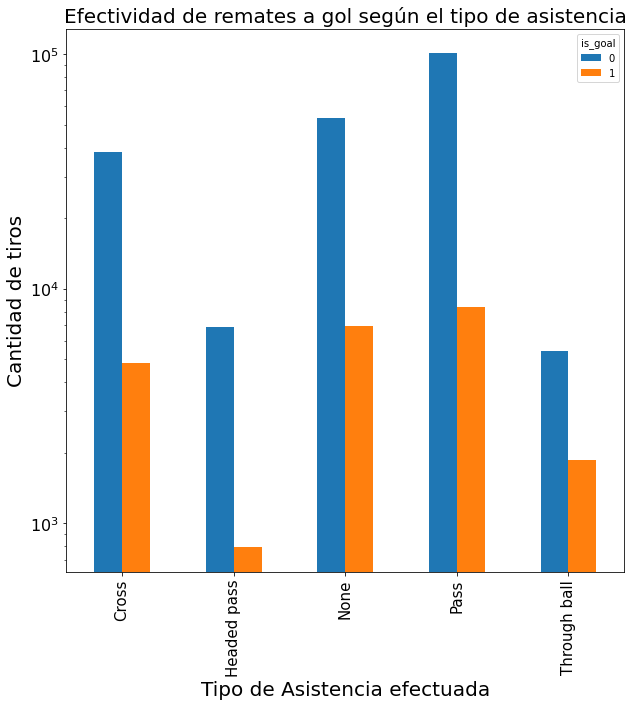

In [48]:

# Realizamos la grafica 
assist_vs_goal1.plot(kind="bar",
                                 stacked=False, figsize = (10,10) )
plt.xlabel ("Tipo de Asistencia efectuada", fontsize=20)
plt.ylabel ("Cantidad de tiros", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=16)
plt.title("Efectividad de remates a gol según el tipo de asistencia", fontsize= 20)
plt.yscale("log")
plt.show()


#### En la gráfica resulta bastante claro como cuando se realiza un pase filtrado (Through ball), es más factible que la jugada termine en gol. <br> Por el contrario, cuando se se da pase con la cabeza (Headed ball), resulta más complicado que la jugada termine en gol.

### Analizamos según la localía, que situaciones terminaron o no en gol.

In [49]:

#Aplicamos un groupby con las 3 variables a analizar.
localia_gol_situacion = events_clean_1.groupby(["side","is_goal","situation"]).size()
localia_gol_situacion


side  is_goal  situation
Away  0        Corner        6573
               Free kick     2136
               Open play    79256
               Set piece     3570
      1        Corner        1019
               Free kick      309
               Open play     6989
               Set piece     1389
Home  0        Corner        8927
               Free kick     2549
               Open play    97170
               Set piece     4500
      1        Corner        1527
               Free kick      414
               Open play     9015
               Set piece     2108
dtype: int64

In [50]:

#Lo convertimos en un dataframe con el método "reset_index"
localia_gol_situacion1 = localia_gol_situacion.reset_index()
localia_gol_situacion1


,side,is_goal,situation,0
0,Away,0,Corner,6573
1,Away,0,Free kick,2136
2,Away,0,Open play,79256
3,Away,0,Set piece,3570
4,Away,1,Corner,1019
5,Away,1,Free kick,309
6,Away,1,Open play,6989
7,Away,1,Set piece,1389
8,Home,0,Corner,8927
9,Home,0,Free kick,2549


In [51]:

#Le aplicamos el método "pivot" para acomodar la tabla de tal manera que se pueda graficar.
localia_gol_situacion2 = pd.pivot_table(localia_gol_situacion1 ,columns =["is_goal", "side"], index="situation", values = 0)
localia_gol_situacion2


is_goal        0            1      
side        Away   Home  Away  Home
situation                          
Corner      6573   8927  1019  1527
Free kick   2136   2549   309   414
Open play  79256  97170  6989  9015
Set piece   3570   4500  1389  2108

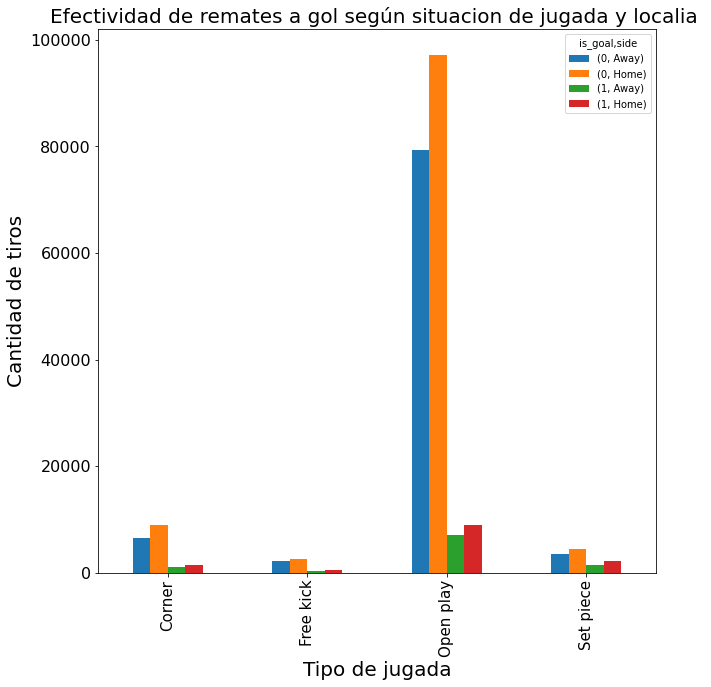

In [52]:

# Realizamos la grafica 
localia_gol_situacion2.plot(kind="bar",
                                  figsize = (10,10) )
plt.xlabel ("Tipo de jugada", fontsize=20)
plt.ylabel ("Cantidad de tiros", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=16)
plt.title("Efectividad de remates a gol según situacion de jugada y localia ", fontsize= 20)
#plt.yscale ("log") 
plt.show()


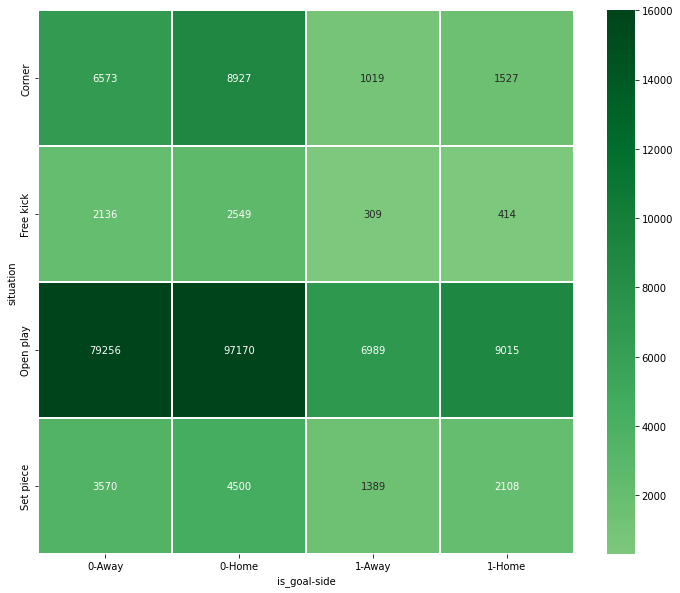

In [53]:

#Graficamos los mismos datos en un heatmap para observar de distinta manera esta misma comparativa.
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(localia_gol_situacion2,cmap="Greens",vmax=16000, center=1000,
           square=False,linewidths=.10, annot=True, fmt="0")
plt.show()


#### En la gráfica de barras podemos apreciar como hay una mayor concentración de ocasiones de gol por parte de los equipos que juegan como local (barras naranja y roja). Y también es claro que la mayor cantidad de ocaciones de gol se dan en jugadas normales de juego y no en las distintas situaciones a balón parado.

#### Por otro lado, la jugadas de táctica fija (Set piece) son las más efectivas para que la jugada termine en anotación, tanto para los locales (31.90%) como para los visitantes (28%).

### Analizamos las ocasiones que terminaron en gol según el tipo de asistencia y la ubicación desde donde se remató.

In [54]:

#Aplicamos un groupby con las 3 variables a analizar.
location_assist_isgoal = events_clean_1.groupby(["location","is_goal","assist_method"]).size()
location_assist_isgoal


location           is_goal  assist_method
Centre of the box  0        Cross            28489
                            Headed pass       2267
                            None              8490
                            Pass             17458
                            Through ball      2189
                                             ...  
Very close range   1        Cross              993
                            Headed pass        213
                            None               970
                            Pass               891
                            Through ball        30
Length: 121, dtype: int64

In [55]:

#Lo convertimos en un dataframe con el método "reset_index"
location_assist_isgoal = location_assist_isgoal.reset_index()
location_assist_isgoal


,location,is_goal,assist_method,0
0,Centre of the box,0,Cross,28489
1,Centre of the box,0,Headed pass,2267
2,Centre of the box,0,None,8490
3,Centre of the box,0,Pass,17458
4,Centre of the box,0,Through ball,2189
...,...,...,...,...
116,Very close range,1,Cross,993
117,Very close range,1,Headed pass,213
118,Very close range,1,None,970
119,Very close range,1,Pass,891


In [56]:

#Le aplicamos el método "pivot" para acomodar la tabla de tal manera que se pueda graficar.
location_assist_isgoal1 = pd.pivot_table(location_assist_isgoal ,columns =["assist_method", "is_goal"], index="location", values = 0)
location_assist_isgoal1


assist_method                     Cross         Headed pass            None  \
is_goal                               0       1           0      1        0   
location                                                                      
Centre of the box               28489.0  3172.0      2267.0  353.0   8490.0   
Difficult angle and long range     18.0     NaN        35.0    1.0    849.0   
Difficult angle on the left       449.0    22.0        82.0    5.0    435.0   
Difficult angle on the right      450.0    15.0        76.0    4.0    450.0   
Left side of the box             1610.0    48.0       561.0   31.0   3200.0   
Left side of the six yard box    1454.0   264.0       137.0   37.0    543.0   
Long range                          3.0     NaN        45.0    NaN    751.0   
More than 35 yards                  2.0     NaN        70.0    1.0    893.0   
More than 40 yards                  NaN     NaN        12.0    1.0    120.0   
Not recorded                        NaN     NaN         NaN    NaN      NaN   
Outside the box                   883.0    16.0      2592.0   79.0  32787.0   
Penalty spot                        NaN     NaN         NaN    NaN    607.0   
Right side of the box            1539.0    55.0       559.0   32.0   3144.0   
Right side of the six yard box   1479.0   263.0       124.0   33.0    519.0   
Very close range                 1754.0   993.0       309.0  213.0    599.0   

assist_method                              Pass         Through ball          
is_goal                              1        0       1            0       1  
location                                                                      
Centre of the box               1830.0  17458.0  3824.0       2189.0  1090.0  
Difficult angle and long range    13.0    567.0    24.0          5.0     1.0  
Difficult angle on the left       34.0   1152.0    90.0        244.0    42.0  
Difficult angle on the right      38.0   1060.0    73.0        235.0    46.0  
Left side of the box             183.0  11296.0   701.0       1132.0   238.0  
Left side of the six yard box    182.0    587.0   161.0         60.0    34.0  
Long range                         5.0   1159.0    23.0          2.0     NaN  
More than 35 yards                10.0    990.0    11.0          NaN     NaN  
More than 40 yards                 NaN    120.0     2.0          NaN     NaN  
Not recorded                     775.0      NaN     NaN          NaN     NaN  
Outside the box                  626.0  54515.0  1671.0        334.0   106.0  
Penalty spot                    1899.0      NaN     NaN          NaN     NaN  
Right side of the box            181.0  10759.0   724.0       1167.0   236.0  
Right side of the six yard box   177.0    534.0   153.0         68.0    38.0  
Very close range                 970.0    646.0   891.0         16.0    30.0

In [57]:

#Se reemplazan los valores nulos por "0"
location_assist_isgoal2 = location_assist_isgoal1.replace(np.nan, 0)
location_assist_isgoal2


assist_method                     Cross         Headed pass            None  \
is_goal                               0       1           0      1        0   
location                                                                      
Centre of the box               28489.0  3172.0      2267.0  353.0   8490.0   
Difficult angle and long range     18.0     0.0        35.0    1.0    849.0   
Difficult angle on the left       449.0    22.0        82.0    5.0    435.0   
Difficult angle on the right      450.0    15.0        76.0    4.0    450.0   
Left side of the box             1610.0    48.0       561.0   31.0   3200.0   
Left side of the six yard box    1454.0   264.0       137.0   37.0    543.0   
Long range                          3.0     0.0        45.0    0.0    751.0   
More than 35 yards                  2.0     0.0        70.0    1.0    893.0   
More than 40 yards                  0.0     0.0        12.0    1.0    120.0   
Not recorded                        0.0     0.0         0.0    0.0      0.0   
Outside the box                   883.0    16.0      2592.0   79.0  32787.0   
Penalty spot                        0.0     0.0         0.0    0.0    607.0   
Right side of the box            1539.0    55.0       559.0   32.0   3144.0   
Right side of the six yard box   1479.0   263.0       124.0   33.0    519.0   
Very close range                 1754.0   993.0       309.0  213.0    599.0   

assist_method                              Pass         Through ball          
is_goal                              1        0       1            0       1  
location                                                                      
Centre of the box               1830.0  17458.0  3824.0       2189.0  1090.0  
Difficult angle and long range    13.0    567.0    24.0          5.0     1.0  
Difficult angle on the left       34.0   1152.0    90.0        244.0    42.0  
Difficult angle on the right      38.0   1060.0    73.0        235.0    46.0  
Left side of the box             183.0  11296.0   701.0       1132.0   238.0  
Left side of the six yard box    182.0    587.0   161.0         60.0    34.0  
Long range                         5.0   1159.0    23.0          2.0     0.0  
More than 35 yards                10.0    990.0    11.0          0.0     0.0  
More than 40 yards                 0.0    120.0     2.0          0.0     0.0  
Not recorded                     775.0      0.0     0.0          0.0     0.0  
Outside the box                  626.0  54515.0  1671.0        334.0   106.0  
Penalty spot                    1899.0      0.0     0.0          0.0     0.0  
Right side of the box            181.0  10759.0   724.0       1167.0   236.0  
Right side of the six yard box   177.0    534.0   153.0         68.0    38.0  
Very close range                 970.0    646.0   891.0         16.0    30.0

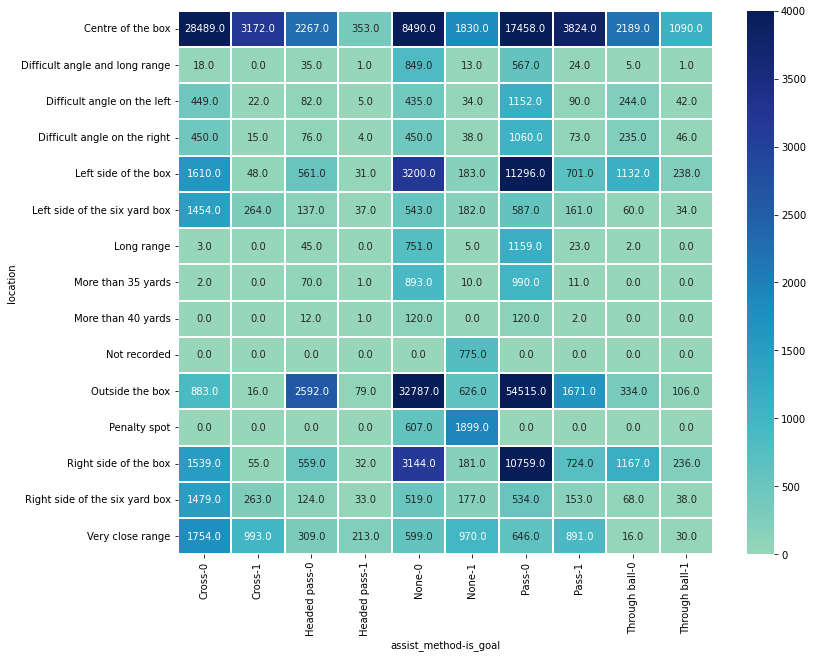

In [58]:

#Graficamos los datos en un heatmap para observar esta comparativa cómo se comporta.
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(location_assist_isgoal2,cmap="YlGnBu",vmax=4000, center=1000,
           square=False,linewidths=.10, annot=True, fmt="0")
plt.show()


#### En este heatmap podemos observar como la gran mayoría de las jugadas se definen desde el centro del área, independientemente del tipo de asistencia.
#### Tambien hay una gran concentración de jugadas que no vienen precedidas de una pase de un compañero (None), en este tipo de jugadas están considerados los penales, lo cuales se anotan mucho más de los que fallan (1899 vs 607).

### Analizamos las jugadas que terminaron en gol según la parte del cuerpo con la que se remató y desde donde se finalizó la jugada.

In [59]:

#Aplicamos un groupby con las 3 variables a analizar.
isgoal_location_body = events_clean_1.groupby(["location","is_goal","bodypart"]).size()
isgoal_location_body


location           is_goal  bodypart  
Centre of the box  0        head          25546
                            left foot     12441
                            right foot    20906
                   1        head           2580
                            left foot      2757
                                          ...  
Very close range   0        left foot       600
                            right foot     1054
                   1        head            944
                            left foot       740
                            right foot     1413
Length: 77, dtype: int64

In [60]:

#Lo convertimos en un dataframe con el método "reset_index"
isgoal_location_body1 = isgoal_location_body.reset_index()
isgoal_location_body1


,location,is_goal,bodypart,0
0,Centre of the box,0,head,25546
1,Centre of the box,0,left foot,12441
2,Centre of the box,0,right foot,20906
3,Centre of the box,1,head,2580
4,Centre of the box,1,left foot,2757
...,...,...,...,...
72,Very close range,0,left foot,600
73,Very close range,0,right foot,1054
74,Very close range,1,head,944
75,Very close range,1,left foot,740


In [61]:

#Le aplicamos el método "pivot" para acomodar la tabla de tal manera que se pueda graficar.
isgoal_location_body2 = pd.pivot_table(isgoal_location_body1 ,columns =["bodypart", "is_goal"], index="location", values = 0)
isgoal_location_body2


bodypart                           head         left foot         right foot  \
is_goal                               0       1         0       1          0   
location                                                                       
Centre of the box               25546.0  2580.0   12441.0  2757.0    20906.0   
Difficult angle and long range      1.0     NaN     530.0    15.0      943.0   
Difficult angle on the left       263.0     8.0    1566.0   125.0      533.0   
Difficult angle on the right      210.0     5.0     200.0    20.0     1861.0   
Left side of the box              751.0    18.0    9444.0   667.0     7604.0   
Left side of the six yard box    1224.0   215.0     829.0   276.0      728.0   
Long range                          NaN     NaN     734.0    11.0     1226.0   
More than 35 yards                  4.0     NaN     597.0     6.0     1354.0   
More than 40 yards                  NaN     NaN      90.0     NaN      162.0   
Not recorded                        NaN     NaN       NaN   261.0        NaN   
Outside the box                   168.0     2.0   33047.0   892.0    57896.0   
Penalty spot                        NaN     NaN     122.0   431.0      485.0   
Right side of the box             705.0    20.0    4049.0   237.0    12414.0   
Right side of the six yard box   1178.0   185.0     271.0    79.0     1275.0   
Very close range                 1670.0   944.0     600.0   740.0     1054.0   

bodypart                                
is_goal                              1  
location                                
Centre of the box               4932.0  
Difficult angle and long range    24.0  
Difficult angle on the left       60.0  
Difficult angle on the right     151.0  
Left side of the box             516.0  
Left side of the six yard box    187.0  
Long range                        17.0  
More than 35 yards                16.0  
More than 40 yards                 3.0  
Not recorded                     514.0  
Outside the box                 1604.0  
Penalty spot                    1468.0  
Right side of the box            971.0  
Right side of the six yard box   400.0  
Very close range                1413.0

In [62]:

#Se reemplazan los valores nulos por "0"
isgoal_location_body2 = isgoal_location_body2.replace(np.nan, 0)


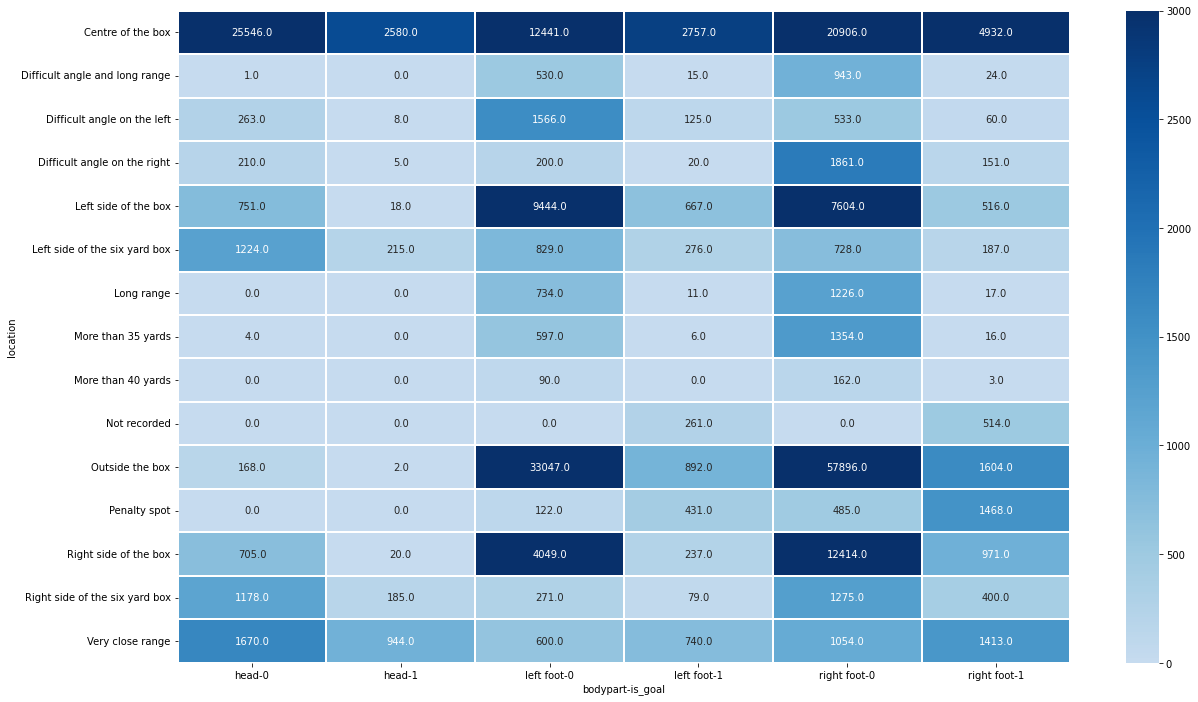

In [63]:

#Graficamos los datos en un heatmap para observar esta comparativa cómo se comporta.
f,ax = plt.subplots(figsize=(20,12))
sns.heatmap(isgoal_location_body2,cmap="Blues",vmax=3000,mask=False,center=1000,
           square=False,linewidths=.10, annot=True,fmt="")
plt.show()

#### En este heatmap se observa como los remates de cabeza que terminan en gol son en su mayoría desde el centro del área (Center of the box) o desde muy cerca del marco (Very close range).
#### Tambien es claro que hay muchos más remates de pie derecho, independientemente de la ubicación.
#### En cuanto a los remates de pie izquierdo, se observa que una gran consentración de estos viene desde el lado izquierdo del área (Left side of the box).

### Por último analizaremos a lo largo de los minutos en que momento hay más goles según la localía.

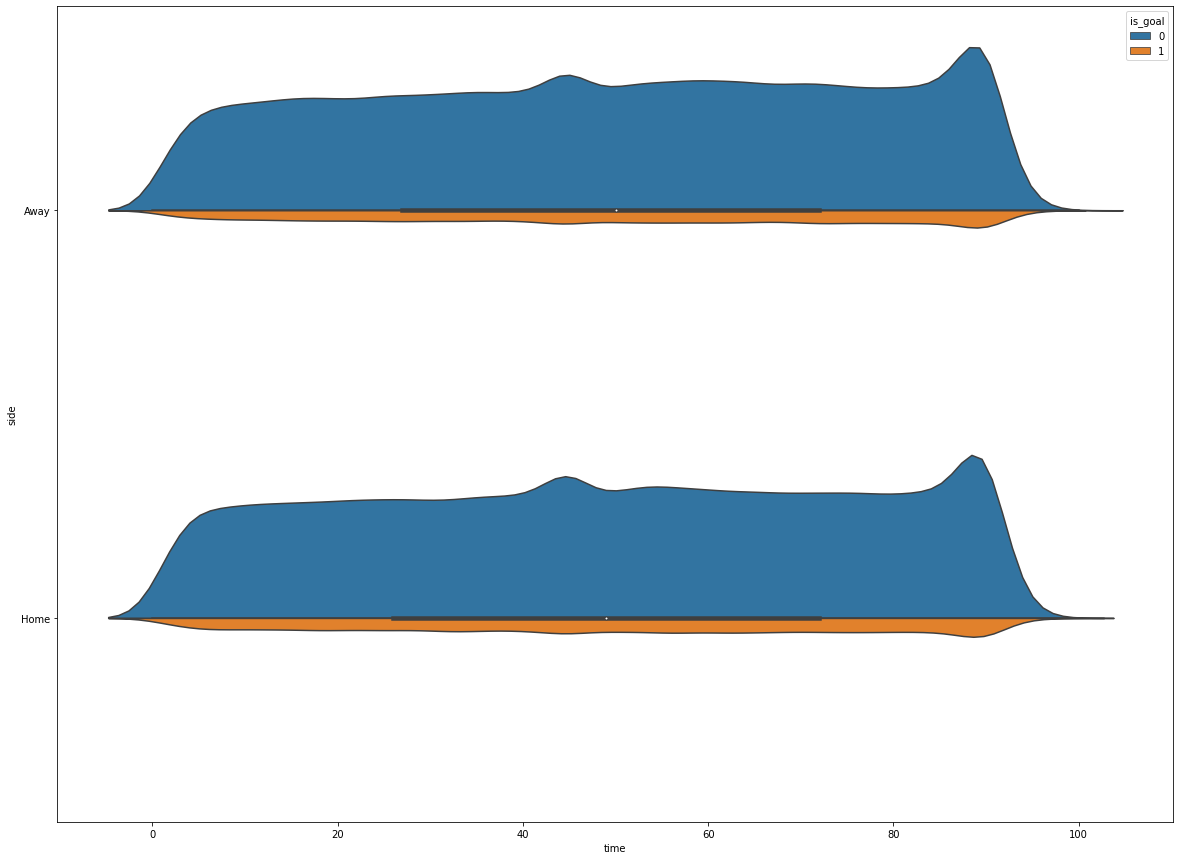

In [64]:

#Realizamos un gráfico de violín para analizar estas variables.
f,ax = plt.subplots(figsize=(20,15))
sns.violinplot(data=events_clean_1, y="side", x="time", hue="is_goal" , bw=0.09, split = True, scale ="count")
plt.show()


#### En este gráfico de violín es claro como a lo largo del encuentro hay muchas más ocasiones que NO terminan en gol en comparación con las que si son gol.
#### Y a pesar de que en otro graficos se observó como el local suele tener más ocasiones por partido, la distribución a lo lardo del encuentro es muy similar tanto para lo locales como para los visitantes.
#### Además, es claro como al final de ambos tiempos (min 45 y min 90) hay más ocasiones de gol, y también se anota con mayor frecuencia, en especial cerca del final.

<br>
<br>
<br>
<br>
<br>
<br>

## Propuesta de Modelos y Optimizaciones.

#### En este apartado se aplicarán distintas optimizaciones y modelos de clasificación en los cuales se desea obtener como objetivo la variable "is_goal".
<br>

#### Debido a que los distintos modelos de clasificación que aplicaremos solo funcionan con datos numéricos, se tomó la decisión de utilizar el dataset sin pasarle el diccionario para que tener las variables categóricas ya encodificadas.

In [65]:

#Leemos el archivo que se utilizará para estos modelos.

ocasiones_num = pd.read_csv("events_num_clean.csv")

ocasiones_num.head()


,Unnamed: 0,time,event_type,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,0,2,1,2,6.0,2.0,0,9.0,2.0,1,1.0
1,11,14,1,1,13.0,2.0,0,15.0,1.0,1,1.0
2,13,17,1,1,4.0,1.0,1,9.0,2.0,1,1.0
3,14,19,1,1,2.0,3.0,0,15.0,1.0,0,1.0
4,17,20,1,2,2.0,3.0,0,15.0,1.0,0,1.0


In [66]:

#Eliminamos las columnas innecesarias.

ocasiones_num.drop(columns="Unnamed: 0", inplace = True)
ocasiones_num.head()


,time,event_type,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation
0,2,1,2,6.0,2.0,0,9.0,2.0,1,1.0
1,14,1,1,13.0,2.0,0,15.0,1.0,1,1.0
2,17,1,1,4.0,1.0,1,9.0,2.0,1,1.0
3,19,1,1,2.0,3.0,0,15.0,1.0,0,1.0
4,20,1,2,2.0,3.0,0,15.0,1.0,0,1.0


In [122]:

#Se aplica el método info para obtener mayor infomación del dataframe que se utilizará para los modelos.
ocasiones_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227452 entries, 0 to 227451
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           227452 non-null  int64  
 1   event_type     227452 non-null  int64  
 2   side           227452 non-null  int64  
 3   shot_place     227452 non-null  float64
 4   shot_outcome   227452 non-null  float64
 5   is_goal        227452 non-null  int64  
 6   location       227452 non-null  float64
 7   bodypart       227452 non-null  float64
 8   assist_method  227452 non-null  int64  
 9   situation      227452 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 17.4 MB


In [67]:
#Se realiza la importación de los modelos y métricas que se planean utilizar.


#Importamos de Sklearn para separar los datos para entrenamiento y prueba.

from sklearn.model_selection import train_test_split


#Importamos los Modelos

from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.linear_model import LogisticRegression #Regresión Logística
from sklearn.ensemble import RandomForestClassifier #Random Forest


#Importamos de Sklearn las distintas métricas.
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix



In [68]:

#Se definen las variabes para nuestro X y nuestro objetivo

X1 = ocasiones_num.drop(columns=["is_goal"]).copy(deep=True)
y1 = ocasiones_num["is_goal"].copy(deep=True)


In [69]:

#Se inicializan los modelos a utilizar.

knn = KNeighborsClassifier()  
lgr = LogisticRegression()     
rfc = RandomForestClassifier() 


In [70]:

# Definimos los sets de entrenamiento y prueba

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state =42)


### K Nearest Neighbor Classifier

In [71]:

#Train KNN

knn.fit(X1_train, y1_train)


KNeighborsClassifier()

In [72]:

#Predict with KNN

knn.predict(X1_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:

#Se generan las variables para la predicción
y1_train_pred = knn.predict(X1_train) #Prediccion en Train
y1_test_pred = knn.predict(X1_test) #Prediccion en Test


In [74]:

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y1_train, y1_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y1_test, y1_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.9448924731182796
% de aciertos sobre el set de evaluación: 0.9241602673075796


#### Al ser un dataset en el cual nuestra variable objetivo es muy asimétrica (90-10, aprox), es normal que obtengamos un accuracy alto, por lo tanto se tomarán en cuenta otras métricas como Recall y Precision.

In [75]:

#Calculo el Recall en Train
train_recall = recall_score(y1_train, y1_train_pred)

#Calculo el Recall en Test
test_recall = recall_score(y1_test, y1_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_recall)
print('% de aciertos sobre el set de evaluación:',test_recall)



% de aciertos sobre el set de entrenamiento: 0.6258303045494423
% de aciertos sobre el set de evaluación: 0.5145331767469172


In [76]:

#Calculo el Precision en Train
train_precision = precision_score(y1_train, y1_train_pred)

#Calculo el Precision en Test
test_precision = precision_score(y1_test, y1_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_precision)
print('% de aciertos sobre el set de evaluación:',test_precision)


% de aciertos sobre el set de entrenamiento: 0.7808444096950743
% de aciertos sobre el set de evaluación: 0.6523357528382654


#### Con estas métricas obtenemos una mejor perspectiva de que tan bien se desempeña el modelo KNN, es claro que en el set de entrenamiento obtiene mejores resultados que en el de prueba.

### Logistic Regression Classifier

In [77]:

#Train LGR

lgr.fit(X1_train, y1_train)


C:\Users\Francisco\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:

#Predict with lgr

#Se generan las variables para la predicción
y1_train_pred = lgr.predict(X1_train) #Prediccion en Train
y1_test_pred = lgr.predict(X1_test) #Prediccion en Test


In [79]:

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y1_train, y1_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y1_test, y1_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.9278464475932067
% de aciertos sobre el set de evaluación: 0.9277800574476815


In [80]:

#Calculo el Recall en Train
train_recall = recall_score(y1_train, y1_train_pred)

#Calculo el Recall en Test
test_recall = recall_score(y1_test, y1_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_recall)
print('% de aciertos sobre el set de evaluación:',test_recall)


% de aciertos sobre el set de entrenamiento: 0.3002255921794711
% de aciertos sobre el set de evaluación: 0.298443922489724


In [81]:

#Calculo el Precision en Train
train_precision = precision_score(y1_train, y1_train_pred)

#Calculo el Precision en Test
test_precision = precision_score(y1_test, y1_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_precision)
print('% de aciertos sobre el set de evaluación:',test_precision)


% de aciertos sobre el set de entrenamiento: 0.937206572769953
% de aciertos sobre el set de evaluación: 0.9317140238313474


#### A diferencia del KNN, en este modelo de Regresión Logísitica es claro como el Recall es muy bajo (y por lo tanto el Precision muy alto).  <br> Será necesario aplicar un Scaling para obtener mejores resultados en este y otros modelos.

### Random Forest Classifier

In [82]:

#Train RFC

rfc.fit(X1_train, y1_train)


RandomForestClassifier()

In [83]:

#Predict with rfc

#Se generan las variables para la predicción
y1_train_pred = rfc.predict(X1_train) #Prediccion en Train
y1_test_pred = rfc.predict(X1_test) #Prediccion en Test


In [84]:

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y1_train, y1_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y1_test, y1_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de entrenamiento: 0.9664166917897699
% de aciertos sobre el set de evaluación: 0.9267395509701624


In [85]:

#Calculo el Recall en Train
train_recall = recall_score(y1_train, y1_train_pred)

#Calculo el Recall en Test
test_recall = recall_score(y1_test, y1_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_recall)
print('% de aciertos sobre el set de evaluación:',test_recall)


% de aciertos sobre el set de entrenamiento: 0.7683920290763253
% de aciertos sobre el set de evaluación: 0.5651790957134468


In [86]:

#Calculo el Precision en Train
train_precision = precision_score(y1_train, y1_train_pred)

#Calculo el Precision en Test
test_precision = precision_score(y1_test, y1_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_precision)
print('% de aciertos sobre el set de evaluación:',test_precision)


% de aciertos sobre el set de entrenamiento: 0.8813340041687631
% de aciertos sobre el set de evaluación: 0.6539833531510107


#### El modelo del Random Forest tiene un mejor desempeño que los otros dos modelos aplicados, pero aún asi en el Recall y Precision del set de prueba, tiene resultados que son bajos en comparativa con el set de entrenamiento. 
<br>

#### Se aplicará una Normalización/Escalamiento para ver si hay mejores resultados en estos modelos.

In [87]:

#Aplicamos una normalización para no tener rangos numéricos tan altos.

from sklearn import preprocessing

X_norm = X1
scaler = preprocessing.MinMaxScaler()
names = X_norm.columns
d = scaler.fit_transform(X_norm)
scaled_X = pd.DataFrame(d, columns=names)
scaled_X.head()


,time,event_type,side,shot_place,shot_outcome,location,bodypart,assist_method,situation
0,0.02,0.0,1.0,0.416667,0.333333,0.375,0.5,0.25,0.0
1,0.14,0.0,0.0,1.000000,0.333333,0.750,0.0,0.25,0.0
2,0.17,0.0,0.0,0.250000,0.000000,0.375,0.5,0.25,0.0
3,0.19,0.0,0.0,0.083333,0.666667,0.750,0.0,0.00,0.0
4,0.20,0.0,1.0,0.083333,0.666667,0.750,0.0,0.00,0.0


#### Después de este procedimiento, se volverán a evaluar los 3 mismos modelos y así ver si hay una mejora en sus desempeños.

In [88]:

# Definimos nuevos sets de entrenamiento y prueba.

X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_X, y1, test_size=0.30, random_state =42)



### KNN

In [89]:

#Train KNN

knn.fit(X2_train, y2_train)


KNeighborsClassifier()

In [90]:

#Se generan las variables para la predicción
y2_train_pred = knn.predict(X2_train) #Prediccion en Train
y2_test_pred = knn.predict(X2_test) #Prediccion en Test


In [91]:

#Calculo el Recall en Train
train_recall = recall_score(y2_train, y2_train_pred)

#Calculo el Recall en Test
test_recall = recall_score(y2_test, y2_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_recall)
print('% de aciertos sobre el set de evaluación:',test_recall)



% de aciertos sobre el set de entrenamiento: 0.6619877177591177
% de aciertos sobre el set de evaluación: 0.5576923076923077


In [92]:

#Calculo el Precision en Train
train_precision = precision_score(y2_train, y2_train_pred)

#Calculo el Precision en Test
test_precision = precision_score(y2_test, y2_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_precision)
print('% de aciertos sobre el set de evaluación:',test_precision)


% de aciertos sobre el set de entrenamiento: 0.7925575812138945
% de aciertos sobre el set de evaluación: 0.6734621521006914


#### En esta ocasión se omitió la evaluación del Accuracy ya que no es relevante, en cambio podemos ver que hubo una pequeña mejoría en las métricas del Recall y Precision.

### LGR

In [93]:

#Train LGR

lgr.fit(X2_train, y2_train)


LogisticRegression()

In [94]:

#Predict with lgr

#Se generan las variables para la predicción
y2_train_pred = lgr.predict(X2_train) #Prediccion en Train
y2_test_pred = lgr.predict(X2_test) #Prediccion en Test


In [95]:

#Calculo el Recall en Train
train_recall = recall_score(y2_train, y2_train_pred)

#Calculo el Recall en Test
test_recall = recall_score(y2_test, y2_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_recall)
print('% de aciertos sobre el set de evaluación:',test_recall)


% de aciertos sobre el set de entrenamiento: 0.2974683544303797
% de aciertos sobre el set de evaluación: 0.29638872577803876


In [96]:

#Calculo el Precision en Train
train_precision = precision_score(y2_train, y2_train_pred)

#Calculo el Precision en Test
test_precision = precision_score(y2_test, y2_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_precision)
print('% de aciertos sobre el set de evaluación:',test_precision)

% de aciertos sobre el set de entrenamiento: 0.9401861754802932
% de aciertos sobre el set de evaluación: 0.9334257975034674


#### En el caso del modelo de Regresión Logística, fue muy evidente que el tiempo de entrenamiento y predicción fue mucho más corto, pero en cuanto a resultados no mejoró en lo absoluto.

### RFC

In [97]:

#Train RFC

rfc.fit(X2_train, y2_train)


RandomForestClassifier()

In [98]:

#Predict with rfc

#Se generan las variables para la predicción
y2_train_pred = rfc.predict(X2_train) #Prediccion en Train
y2_test_pred = rfc.predict(X2_test) #Prediccion en Test


In [99]:

#Calculo el Recall en Train
train_recall = recall_score(y2_train, y2_train_pred)

#Calculo el Recall en Test
test_recall = recall_score(y2_test, y2_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_recall)
print('% de aciertos sobre el set de evaluación:',test_recall)


% de aciertos sobre el set de entrenamiento: 0.7700839704223587
% de aciertos sobre el set de evaluación: 0.5651790957134468


In [100]:

#Calculo el Precision en Train
train_precision = precision_score(y2_train, y2_train_pred)

#Calculo el Precision en Test
test_precision = precision_score(y2_test, y2_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_precision)
print('% de aciertos sobre el set de evaluación:',test_precision)


% de aciertos sobre el set de entrenamiento: 0.879859669220305
% de aciertos sobre el set de evaluación: 0.6553191489361702


#### En el modelo del Random Forest tampoco se observa una mejoría en el desempelo del modelo, aún así es el que mejor se desempeña. 

#### Se realiza la matriz de confusión para el set de prueba, y así obtener numéricamente que resultados se obtienen con este modelo.

C:\Users\Francisco\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


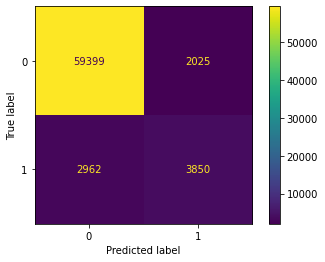

In [102]:

#matriz de confusión del set de test

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc, X2_test, y2_test)
plt.show()


#### En la matriz de confusión del set de entrenamiento vemos que se desempeña de buena manera al tener un buen porcentaje de aciertos (77%) en las jugadas que SI terminan en gol (1), pero ya al probar el modelo con el set de prueba se observa como estos aciertos bajan mucho, ya que es solo un 56% de aciertos.

#### También se hizo la prueba con el modelo de Support Vector Machines, pero en este modelo notamos que tardó mucho en entrerse y predecir los resultados y no se obtuvo un mejor desempeño que con los otros modelos, por lo cual no se dejó en esta notebook.

#### En esta parte hemos llegado a la conclusión de que no ha sido suficiente con la normalización para que mejore sustancialmente el desempeño de nuestros modelos. Se plantea que habrá que hacer otras optimizaciones de hiperparámetros (hypertuning) o probar otro modelo como el XGBoost Classifier.

#### Ya una vez que se hayan aplicado las optimizaciones necesarias podremos elegir el modelo que mejor se ajusta a nuestras necesidades.

In [103]:
#Importamos las nuevas librerías a utilizar.

#Modelo XGBoost 
import xgboost as xgb

#Stratified K-fold
from sklearn.model_selection import StratifiedKFold

#Optuna para la optimización de parámetros
import optuna


### XGBoost Classifier

In [104]:

#Se inicializa y entrena el modelo XGBoost

xgbc = xgb.XGBClassifier()
xgbc.fit(X2_train, y2_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [105]:

#Predict with XGBC

#Se generan las variables para la predicción
y2_train_pred = xgbc.predict(X2_train) #Prediccion en Train
y2_test_pred = xgbc.predict(X2_test) #Prediccion en Test


In [106]:

#Calculo el Recall en Train
train_precision = recall_score(y2_train, y2_train_pred)

#Calculo el Recall en Test
test_precision = recall_score(y2_test, y2_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_precision)
print('% de aciertos sobre el set de evaluación:',test_precision)


% de aciertos sobre el set de entrenamiento: 0.6356686301541546
% de aciertos sobre el set de evaluación: 0.6033470346447446


C:\Users\Francisco\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


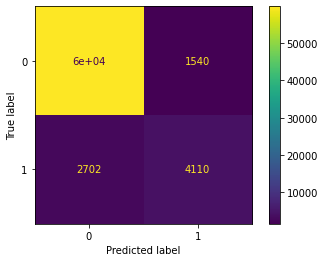

In [107]:

#Matriz de confusión del set de test

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgbc, X2_test, y2_test)
plt.show()


#### En este modelo podemos observar que obtuvimos un mejor resultado de Recall (60.33%) que en los modelos anteriores.  

#### Se hará una optimización de hiperparámetros para este modelo y así poder obtener un mejor resultado.

#### OPTUNA

In [108]:

#Se define una función "objetivo" en la  que se enuncian los parámetros del modelo que se buscan optimizar.
#Se toma como base la métrica de REcall porque es la que se busca mejorar.

def objective(trial):
  params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
      
  xgbc = xgb.XGBClassifier(**params) 
  xgbc.fit(X2_train, y2_train)

  y2_test_pred = xgbc.predict(X2_test)
  recall = recall_score(y2_test, y2_test_pred)


  return recall

In [110]:

#Se crea un "study" de Optuna en elq ue se define que en la métrica de Recall se busca maximizar el resultado.
#Se define que se harán 30 pruebas para buscar el mejor resultado.

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=30)

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    

[I 2022-10-30 12:03:27,537] A new study created in memory with name: no-name-872a39af-51bd-4abe-997b-5f547a6c50c3
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. S

[I 2022-10-30 12:03:47,142] Trial 3 finished with value: 0.5982090428655314 and parameters: {'max_depth': 3, 'learning_rate': 0.34553844378909504, 'n_estimators': 480, 'min_child_weight': 4, 'gamma': 0.6840873842143894, 'subsample': 0.7192663547525717, 'colsample_bytree': 0.767884881216226, 'reg_alpha': 3.0134920181082305e-05, 'reg_lambda': 1.4657279713621851e-08}. Best is trial 3 with value: 0.5982090428655314.
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/

[I 2022-10-30 12:04:13,877] Trial 7 finished with value: 0.5920434527304757 and parameters: {'max_depth': 8, 'learning_rate': 0.14157299966345907, 'n_estimators': 443, 'min_child_weight': 10, 'gamma': 2.3225990812929159e-07, 'subsample': 0.2727653728046052, 'colsample_bytree': 0.4402788446390815, 'reg_alpha': 3.681255292430004e-08, 'reg_lambda': 0.008654758031179056}. Best is trial 3 with value: 0.5982090428655314.
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releas

[I 2022-10-30 12:04:37,306] Trial 11 finished with value: 0.6004110393423371 and parameters: {'max_depth': 1, 'learning_rate': 0.9985543321375727, 'n_estimators': 491, 'min_child_weight': 4, 'gamma': 0.7123691428969241, 'subsample': 0.9408304478013416, 'colsample_bytree': 0.9715594667975478, 'reg_alpha': 0.003969494693452251, 'reg_lambda': 8.35561421660992e-06}. Best is trial 10 with value: 0.6030534351145038.
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

[I 2022-10-30 12:05:01,299] Trial 15 finished with value: 0.5298003523194363 and parameters: {'max_depth': 2, 'learning_rate': 0.6855485784723729, 'n_estimators': 426, 'min_child_weight': 4, 'gamma': 0.007785258973678346, 'subsample': 0.010352353516691852, 'colsample_bytree': 0.1426839031557846, 'reg_alpha': 0.030884408443972566, 'reg_lambda': 9.155173881167641e-06}. Best is trial 10 with value: 0.6030534351145038.
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releas

[I 2022-10-30 12:05:32,759] Trial 19 finished with value: 0.5876394597768644 and parameters: {'max_depth': 4, 'learning_rate': 0.4806757122775609, 'n_estimators': 448, 'min_child_weight': 5, 'gamma': 0.05950184403296732, 'subsample': 0.4685300924599558, 'colsample_bytree': 0.7075846811245876, 'reg_alpha': 0.02918400057800273, 'reg_lambda': 1.3233061109386246e-06}. Best is trial 10 with value: 0.6030534351145038.
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/

[I 2022-10-30 12:06:02,943] Trial 23 finished with value: 0.34263065179095714 and parameters: {'max_depth': 2, 'learning_rate': 0.01709890151743843, 'n_estimators': 402, 'min_child_weight': 3, 'gamma': 0.02499212573546049, 'subsample': 0.3980837734148386, 'colsample_bytree': 0.6406379558747302, 'reg_alpha': 1.0628182157756383e-05, 'reg_lambda': 1.6346951720046354e-05}. Best is trial 21 with value: 0.6123018203170875.
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

[I 2022-10-30 12:06:33,647] Trial 27 finished with value: 0.3734586024662361 and parameters: {'max_depth': 3, 'learning_rate': 0.050104014791906584, 'n_estimators': 419, 'min_child_weight': 5, 'gamma': 0.0003038376654715256, 'subsample': 0.101067716102124, 'colsample_bytree': 0.10235445457602546, 'reg_alpha': 1.2151845211273433e-05, 'reg_lambda': 0.0002275315532108077}. Best is trial 21 with value: 0.6123018203170875.
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Francisco\AppData\Local\Temp\ipykernel_20364\2943646221.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

Number of finished trials: 30
Best trial:
  Value: 0.6123018203170875
  Params: 
    max_depth: 2
    learning_rate: 0.07764095740813147
    n_estimators: 493
    min_child_weight: 4
    gamma: 0.10277810638464777
    subsample: 0.5908454765116581
    colsample_bytree: 0.843455998318367
    reg_alpha: 0.0006306495627941058
    reg_lambda: 3.470975435209466e-05


In [111]:

#Se crea un nuevo modelo de XGBoost con los parámetros optimizados según OPTUNA

params2 = {
    'max_depth': 2,
    'learning_rate': 0.07764095740813147,
    'n_estimators': 493,
    'min_child_weight': 4,
    'gamma': 0.10277810638464777,
    'subsample': 0.5908454765116581,
    'colsample_bytree': 0.843455998318367,
    'reg_alpha': 0.0006306495627941058,
    'reg_lambda': 3.470975435209466e-05
         }


xgbc_optuna = xgb.XGBClassifier(**params2)


In [112]:

#Se entrena el modelo con estos nuevos parámetros

xgbc_optuna.fit(X2_train, y2_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.843455998318367, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.10277810638464777, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.07764095740813147, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=2, max_leaves=0,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=493, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0.0006306495627941058,
              reg_lambda=3.470975435209466e-05, ...)

In [113]:

#Predict with XGBC

#Se generan las variables para la predicción
y2_train_pred = xgbc_optuna.predict(X2_train) #Prediccion en Train
y2_test_pred = xgbc_optuna.predict(X2_test) #Prediccion en Test


In [114]:

#Calculo el Recall en Train
train_precision = recall_score(y2_train, y2_train_pred)

#Calculo el Recall en Test
test_precision = recall_score(y2_test, y2_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_precision)
print('% de aciertos sobre el set de evaluación:',test_precision)


% de aciertos sobre el set de entrenamiento: 0.6240756987091114
% de aciertos sobre el set de evaluación: 0.6123018203170875


C:\Users\Francisco\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


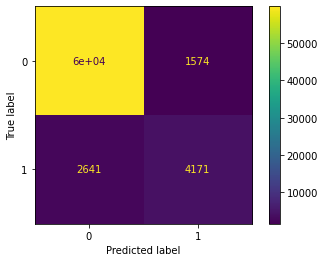

In [115]:

#Matriz de confusión del set de test

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgbc_optuna, X2_test, y2_test)
plt.show()


In [121]:

#Se hace una prueba aplicando un Stratified K-Fold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in skf.split(scaled_X,y1):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = scaled_X.loc[train_index],scaled_X.loc[test_index]
    ytr,yvl = y1.loc[train_index],y1.loc[test_index]
    
    #model
  
    xgbc_optuna.fit(xtr,ytr)
    score = recall_score(yvl,xgbc_optuna.predict(xvl))
    print('Recall score:',score)
    cv_score.append(score)    
    pred_test = xgbc_optuna.predict_proba(X2_test)[:,1]
    pred_test_full +=pred_test
    i+=1
    

1 of KFold 5
Recall score: 0.6185770750988142
2 of KFold 5
Recall score: 0.6236275801493193
3 of KFold 5
Recall score: 0.61133069828722
4 of KFold 5
Recall score: 0.6163812033377251
5 of KFold 5
Recall score: 0.6135265700483091


#### Despúes de aplicar la optimización de hiperparámetros con OPTUNA obtuvimos un Recall de 61.23%
#### Pero una vez que se aplicó a este mismo modelo un Stratified KFold de 5 divisiones y obtuvimos un resultado promedio de Recall aún más alto 61.67%.
#### En conclusión, el modelo que hemos elegido es el XGBoost Classifier, ya que con este modelo optimizado obtuvimos el Recall más alto entre todos los modelos probados con este dataset.